In [6]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [7]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [8]:
dengue = pd.read_csv( r'../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'} , low_memory = False)
#, thousands = "," 

In [9]:
dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [254]:
#dengue['Ubigeo'] = dengue['Ubigeo'].astype(str).astype(int)

In [10]:
dengue['UbigeoD'] = dengue['Ubigeo'].astype(str).str[:2]

In [12]:
dengue['UbigeoP'] = dengue['Ubigeo'].astype(str).str[:4]

In [36]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [48]:
#maps = maps[['UBIGEO', 'geometry']]
maps = maps.rename({'UBIGEO':'Ubigeo'}, axis =1 )
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,Ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [319]:
#maps['Ubigeo'] = maps['Ubigeo'].astype('Int64')

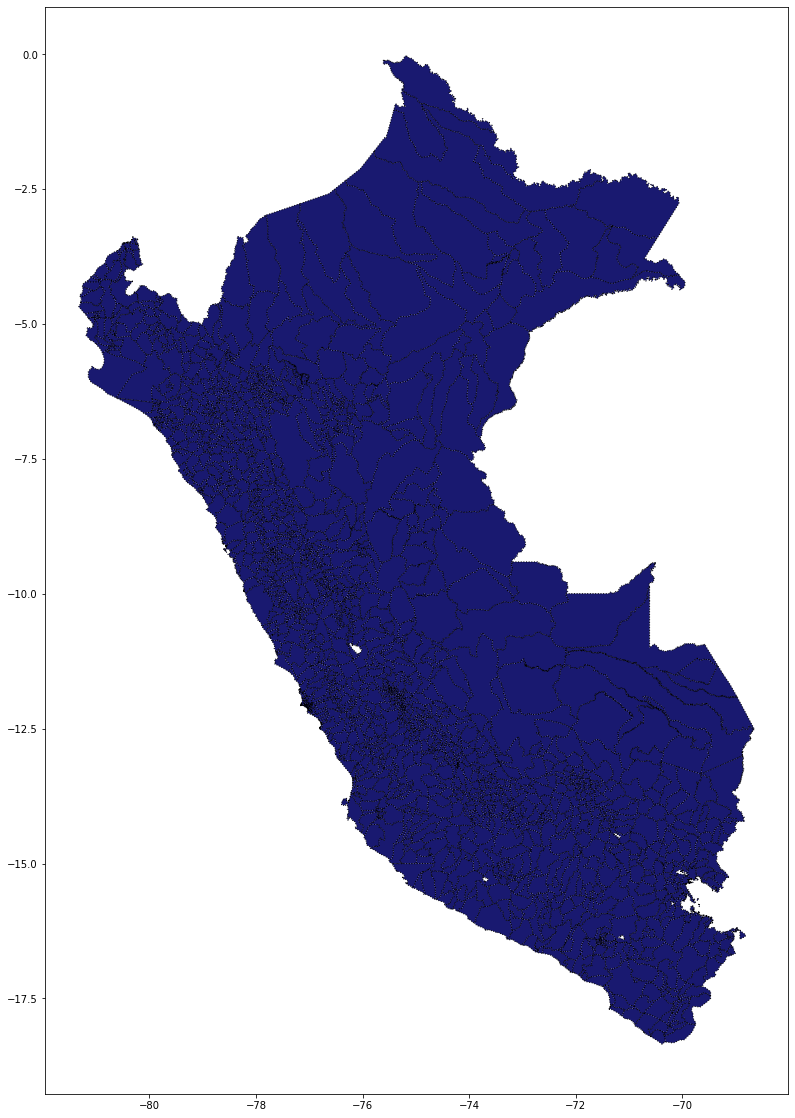

In [320]:
#fig, ax = plt.subplots(figsize=(20, 20))

#maps.plot(  ax=ax, color='midnightblue', linestyle='dotted',
            edgecolor='black' )
#plt.show()

4. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values.

In [17]:
dengue_2021 = dengue[dengue.Año == 2021]

In [22]:
dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'])

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_19348\312242040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'])


In [26]:
ex4 = dengue_2021.groupby(['Ubigeo'], as_index= False)[['Casos']].sum()
ex4

,Ubigeo,Casos
0,010101,0.0
1,010201,474.0
2,010202,25.0
3,010203,38.0
4,010204,8.0
...,...,...
464,250302,26.0
465,250303,32.0
466,250304,14.0
467,250305,2.0


In [44]:
dataset = pd.merge(maps, ex4, how="left", on= "Ubigeo")
dataset

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,Ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry,Casos
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN


<AxesSubplot:>

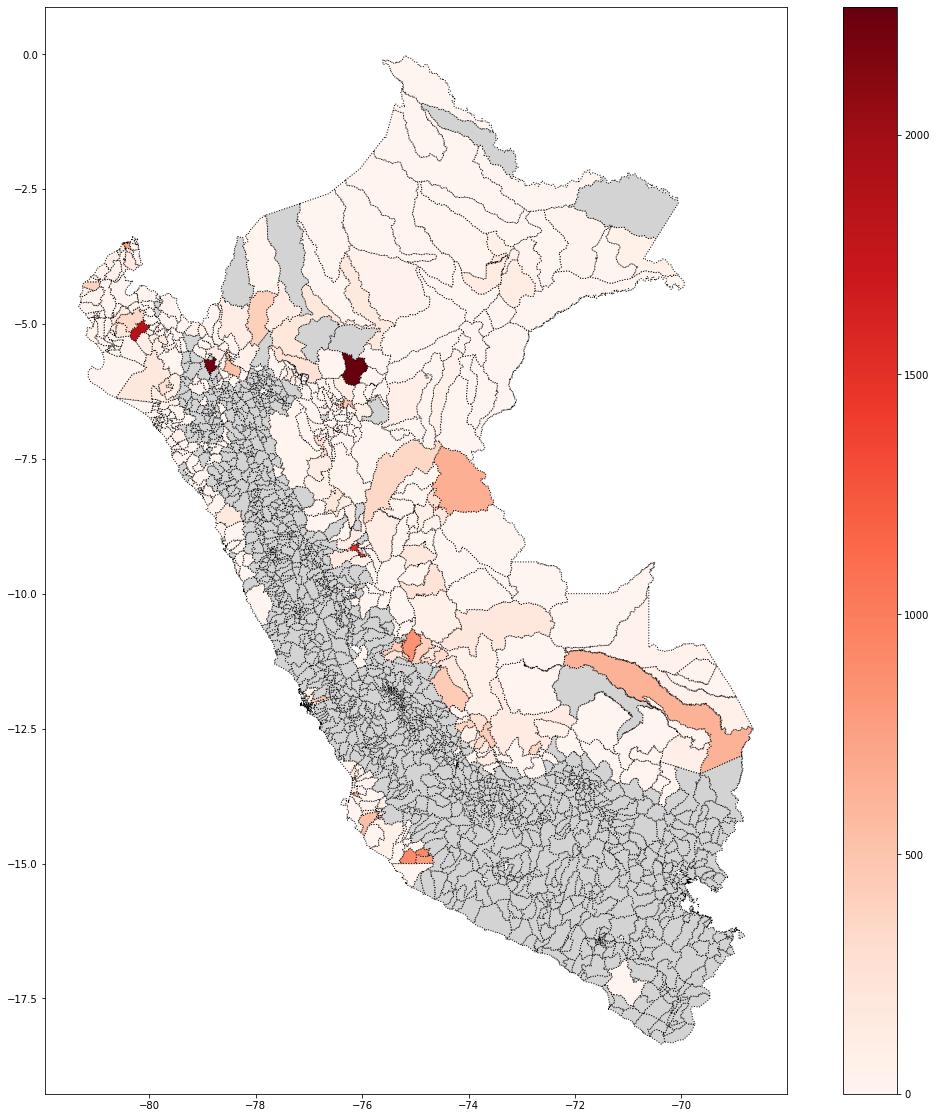

In [35]:
fig, ax = plt.subplots( figsize = ( 20, 20 ) )

dataset.plot( ax = ax, column = 'Casos', cmap = 'Reds', 
             linestyle = 'dotted', 
             edgecolor = 'black', missing_kwds= {
                 "color": "lightgrey"},
             legend = True,
             )

5. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [40]:
ex5 = dengue_2021.groupby(['UbigeoP'], as_index= False)[['Casos']].sum()
ex5

,UbigeoP,Casos
0,0101,0.0
1,0102,676.0
2,0103,0.0
3,0104,435.0
4,0107,719.0
...,...,...
87,2403,72.0
88,2501,1241.0
89,2502,179.0
90,2503,193.0


In [59]:
maps = maps.rename({'IDPROV':'UbigeoP'}, axis =1 )
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,Ubigeo,UbigeoP,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [56]:
dataset_2 = pd.merge(ex5, maps, how="left", on= "UbigeoP")
dataset_2

,UbigeoP,Casos,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,Ubigeo,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,0101,0.0,01,AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-77.86211 -6.86880, -77.86070 -6.870..."
1,0101,0.0,01,AMAZONAS,01,CHACHAPOYAS,03,BALSAS,BALSAS,010103,010103,27,BALSAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-77.93580 -6.69039, -77.93531 -6.690..."
2,0101,0.0,01,AMAZONAS,01,CHACHAPOYAS,10,LEIMEBAMBA,LEIMEBAMBA,010110,010110,68,LEIMEBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-77.74017 -6.64825, -77.73967 -6.649..."
3,0101,0.0,01,AMAZONAS,01,CHACHAPOYAS,13,MARISCAL CASTILLA,DURAZNOPAMPA,010113,010113,69,MARISCAL CASTILLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-77.75246 -6.54540, -77.75035 -6.546..."
4,0101,0.0,01,AMAZONAS,01,CHACHAPOYAS,15,MONTEVIDEO,MONTEVIDEO,010115,010115,17,MONTEVIDEO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-77.66655 -6.57826, -77.66609 -6.578..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2503,193.0,25,UCAYALI,03,PADRE ABAD,05,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,250305,250305,14,ALEXANDER VON HUMBOLDT,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739..."
776,2503,193.0,25,UCAYALI,03,PADRE ABAD,02,IRAZOLA,SAN ALEJANDRO,250302,250302,66,IRAZOLA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-75.14649 -8.53886, -75.14614 -8.544..."
777,2503,193.0,25,UCAYALI,03,PADRE ABAD,04,NESHUYA,MONTE ALEGRE,250304,250304,27,NESHUYA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-75.01663 -8.44514, -75.01650 -8.445..."
778,2503,193.0,25,UCAYALI,03,PADRE ABAD,03,CURIMANA,CURIMANA,250303,250303,39,CURIMANA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-75.45297 -8.21007, -75.45304 -8.210..."


AttributeError: 'Line2D' object has no property 'edgecolor'

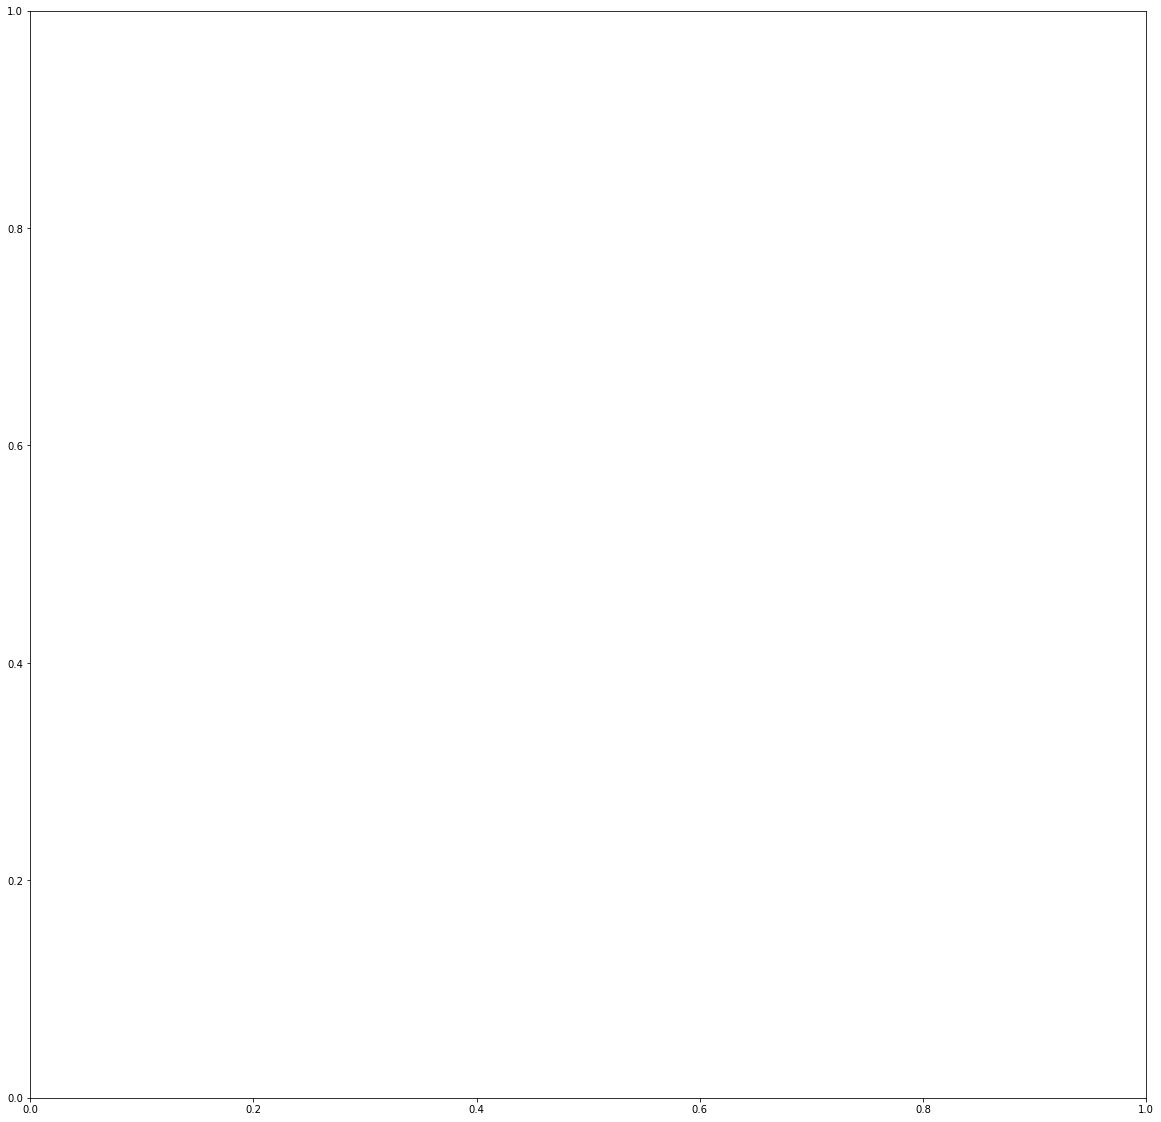

In [57]:
fig, ax = plt.subplots( figsize = ( 20, 20 ) )

dataset_2.plot( ax = ax, column = 'Casos', cmap = 'Reds', 
             linestyle = 'dotted', 
             edgecolor = 'black', missing_kwds= {
                 "color": "lightgrey"},
             legend = True,
             )